In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# loading the dataset

soil_df = pd.read_csv('/content/drive/MyDrive/Weather_Soil_Data/SoilWeatherData/train_timeseries/train_timeseries.csv')
soil_df.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,...,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
1,1001,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,...,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,NaN
2,1001,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,...,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,NaN
3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,...,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,1001,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,...,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,NaN


In [ ]:
drought_df = soil_df.copy()
drought_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19300680 entries, 0 to 19300679
Data columns (total 21 columns):
 #   Column       Dtype  
---  ------       -----  
 0   fips         int64  
 1   date         object 
 2   PRECTOT      float64
 3   PS           float64
 4   QV2M         float64
 5   T2M          float64
 6   T2MDEW       float64
 7   T2MWET       float64
 8   T2M_MAX      float64
 9   T2M_MIN      float64
 10  T2M_RANGE    float64
 11  TS           float64
 12  WS10M        float64
 13  WS10M_MAX    float64
 14  WS10M_MIN    float64
 15  WS10M_RANGE  float64
 16  WS50M        float64
 17  WS50M_MAX    float64
 18  WS50M_MIN    float64
 19  WS50M_RANGE  float64
 20  score        float64
dtypes: float64(19), int64(1), object(1)
memory usage: 3.0+ GB


In [ ]:
print(drought_df.shape)
drought_df.isnull().sum()

(19300680, 21)


,0
fips,0
date,0
PRECTOT,0
PS,0
QV2M,0
T2M,0
T2MDEW,0
T2MWET,0
T2M_MAX,0
T2M_MIN,0


In [ ]:
drought_df = soil_df.sample(frac=0.05, random_state=42)
print(drought_df.shape)

(965034, 21)


In [ ]:
drought_df = drought_df.dropna()
print(drought_df.shape)
drought_df.isnull().sum()

(137484, 21)


,0
fips,0
date,0
PRECTOT,0
PS,0
QV2M,0
T2M,0
T2MDEW,0
T2MWET,0
T2M_MAX,0
T2M_MIN,0


In [ ]:
print(drought_df.columns)
print(drought_df.nunique())
print(drought_df.dtypes)

Index(['fips', 'date', 'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET',
       'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX',
       'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN',
       'WS50M_RANGE', 'score'],
      dtype='object')
fips            3108
date             887
PRECTOT         3912
PS              3320
QV2M            2059
T2M             5521
T2MDEW          4840
T2MWET          4810
T2M_MAX         5847
T2M_MIN         5405
T2M_RANGE       2397
TS              5745
WS10M           1208
WS10M_MAX       1566
WS10M_MIN        967
WS10M_RANGE     1307
WS50M           1495
WS50M_MAX       1878
WS50M_MIN       1257
WS50M_RANGE     1534
score          23059
dtype: int64
fips             int64
date            object
PRECTOT        float64
PS             float64
QV2M           float64
T2M            float64
T2MDEW         float64
T2MWET         float64
T2M_MAX        float64
T2M_MIN        float64
T2M_RANGE      float64
TS             float64
W

In [ ]:
drought_df.shape

(137484, 21)

In [ ]:
drought_df.describe()

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
count,137484.000000,137484.000000,137484.000000,137484.000000,137484.000000,137484.000000,137484.000000,137484.000000,137484.000000,137484.000000,137484.000000,137484.000000,137484.000000,137484.000000,137484.000000,137484.000000,137484.000000,137484.000000,137484.000000,137484.000000
mean,30691.251135,2.693835,96.628716,7.874212,12.918365,7.043678,7.079213,18.791722,7.530352,11.261393,12.995541,3.570075,5.213825,1.922887,3.290942,5.540511,7.839631,3.125464,4.714138,0.828977
std,14969.906031,6.183310,5.453799,4.726037,10.960407,10.191369,10.137576,11.593840,10.607681,4.040789,11.178116,1.847474,2.610814,1.343673,1.948717,2.297077,2.838726,2.110359,2.188184,1.227735
min,1001.000000,0.000000,67.480000,0.230000,-29.930000,-30.540000,-30.220000,-27.510000,-37.230000,0.160000,-30.250000,0.380000,0.810000,0.000000,0.290000,0.600000,1.200000,0.000000,0.570000,0.000000
25%,19049.000000,0.000000,95.800000,3.820000,4.590000,-0.880000,-0.850000,10.360000,-0.570000,8.400000,4.470000,2.150000,3.140000,0.970000,1.820000,3.830000,5.710000,1.460000,3.140000,0.000000
50%,29221.000000,0.180000,98.270000,6.920000,14.210000,7.760000,7.760000,20.670000,8.250000,11.200000,14.230000,3.160000,4.710000,1.660000,2.830000,5.150000,7.350000,2.770000,4.280000,0.000000
75%,46009.000000,2.240000,99.930000,11.450000,22.032500,15.680000,15.680000,27.970000,16.310000,14.090000,22.220000,4.600000,6.770000,2.560000,4.300000,6.880000,9.510000,4.390000,5.820000,1.200425
max,56043.000000,118.350000,103.750000,21.790000,38.800000,26.540000,26.540000,46.540000,32.140000,28.820000,41.060000,16.770000,20.810000,13.400000,17.240000,21.080000,25.530000,16.950000,20.600000,5.000000


In [ ]:
drought_df.columns

Index(['fips', 'date', 'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET',
       'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX',
       'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN',
       'WS50M_RANGE', 'score'],
      dtype='object')

In [ ]:
drought_df = drought_df.drop('date', axis=1)

In [ ]:
drought_df['score'].round().value_counts()

,count
score,
0.0,82134
1.0,23481
2.0,14727
3.0,9766
4.0,5325
5.0,2051


In [ ]:
print("\nSkewness: \n", drought_df.skew(axis = 0, skipna = True))
print("\nKurtosis: \n", drought_df.kurtosis(axis = 0, skipna = True))


Skewness: 
 fips          -0.080359
PRECTOT        4.431119
PS            -2.127643
QV2M           0.531468
T2M           -0.422652
T2MDEW        -0.294151
T2MWET        -0.280537
T2M_MAX       -0.465533
T2M_MIN       -0.358934
T2M_RANGE      0.095421
TS            -0.391924
WS10M          1.107480
WS10M_MAX      0.924236
WS10M_MIN      1.407045
WS10M_RANGE    1.278886
WS50M          0.857749
WS50M_MAX      0.895096
WS50M_MIN      0.859319
WS50M_RANGE    1.208803
score          1.502788
dtype: float64

Kurtosis: 
 fips           -1.099145
PRECTOT        29.348346
PS              4.790896
QV2M           -0.779682
T2M            -0.570796
T2MDEW         -0.748748
T2MWET         -0.773320
T2M_MAX        -0.519309
T2M_MIN        -0.475091
T2M_RANGE      -0.310303
TS             -0.555034
WS10M           1.376827
WS10M_MAX       0.664789
WS10M_MIN       3.176933
WS10M_RANGE     2.043073
WS50M           0.777393
WS50M_MAX       0.944766
WS50M_MIN       0.586237
WS50M_RANGE     2.176158
scor

In [ ]:
categorical_column1 = list(set(drought_df. columns) - set(drought_df. describe(). columns))
categorical_column1

[]

In [ ]:
needed_columns = ['PRECTOT','PS','QV2M','T2M','T2MDEW','T2MWET','T2M_MAX','T2M_MIN','T2M_RANGE','TS','WS10M','WS10M_MAX','WS10M_MIN','WS10M_RANGE','WS50M','WS50M_MAX','WS50M_MIN','WS50M_RANGE']

In [ ]:
new_data = drought_df[needed_columns]
drought_df_measures = drought_df[needed_columns]

In [ ]:
# plt.figure(figsize=(15,10))
# drought_df.hist(bins=20, figsize=(15,10), color='orange', edgecolor='black')
# plt.tight_layout()

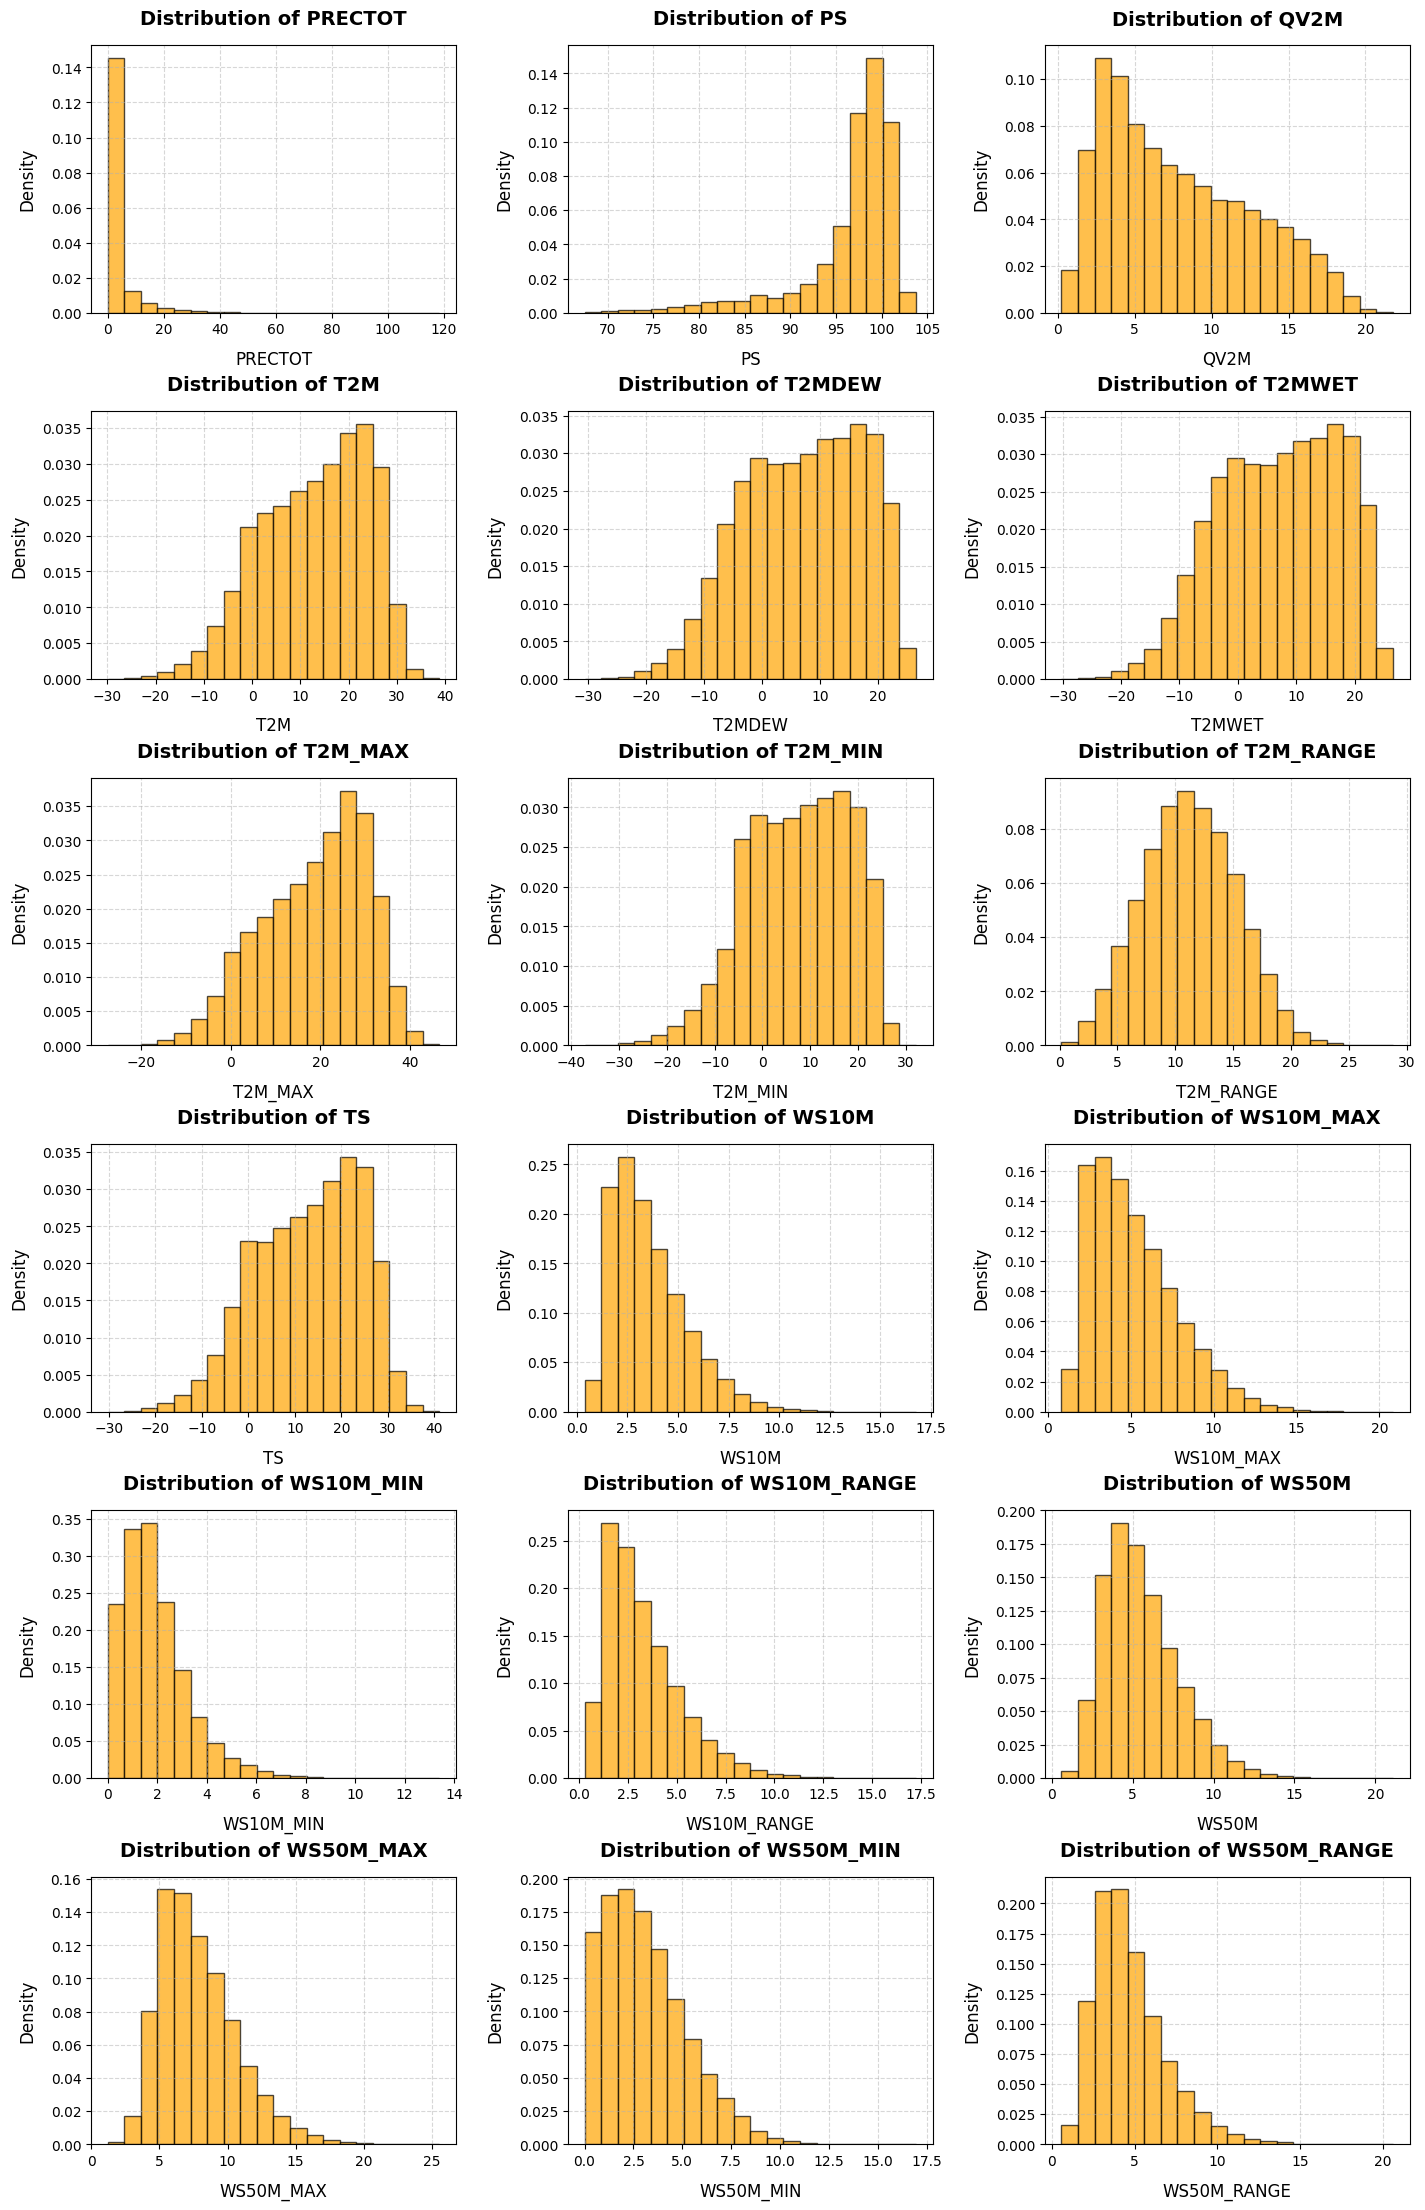

In [ ]:
import matplotlib.pyplot as plt

# Number of rows and columns for the grid
rows, cols = 8, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 30))
fig.tight_layout(pad=5.0)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through the columns for plotting
for idx, col_name in enumerate(needed_columns):
    if idx >= len(axes):  # Check if we have more plots than grid cells
        break
    ax = axes[idx]

    # Plot histogram with transparency and improved color
    ax.hist(drought_df_measures[col_name], bins=20, density=True, color='orange', alpha=0.7, edgecolor='black')

    # Improve axis labels and title
    ax.set_xlabel(col_name, fontsize=12, labelpad=10)
    ax.set_ylabel('Density', fontsize=12, labelpad=10)
    ax.set_title(f'Distribution of {col_name}', fontsize=14, fontweight='bold', pad=15)

    # Add gridlines for better visualization
    ax.grid(True, linestyle='--', alpha=0.5)

    # Increase tick label size
    ax.tick_params(axis='both', which='major', labelsize=10)

# Hide any unused subplots
for i in range(len(needed_columns), len(axes)):
    axes[i].set_visible(False)

# Show the plot
plt.show()


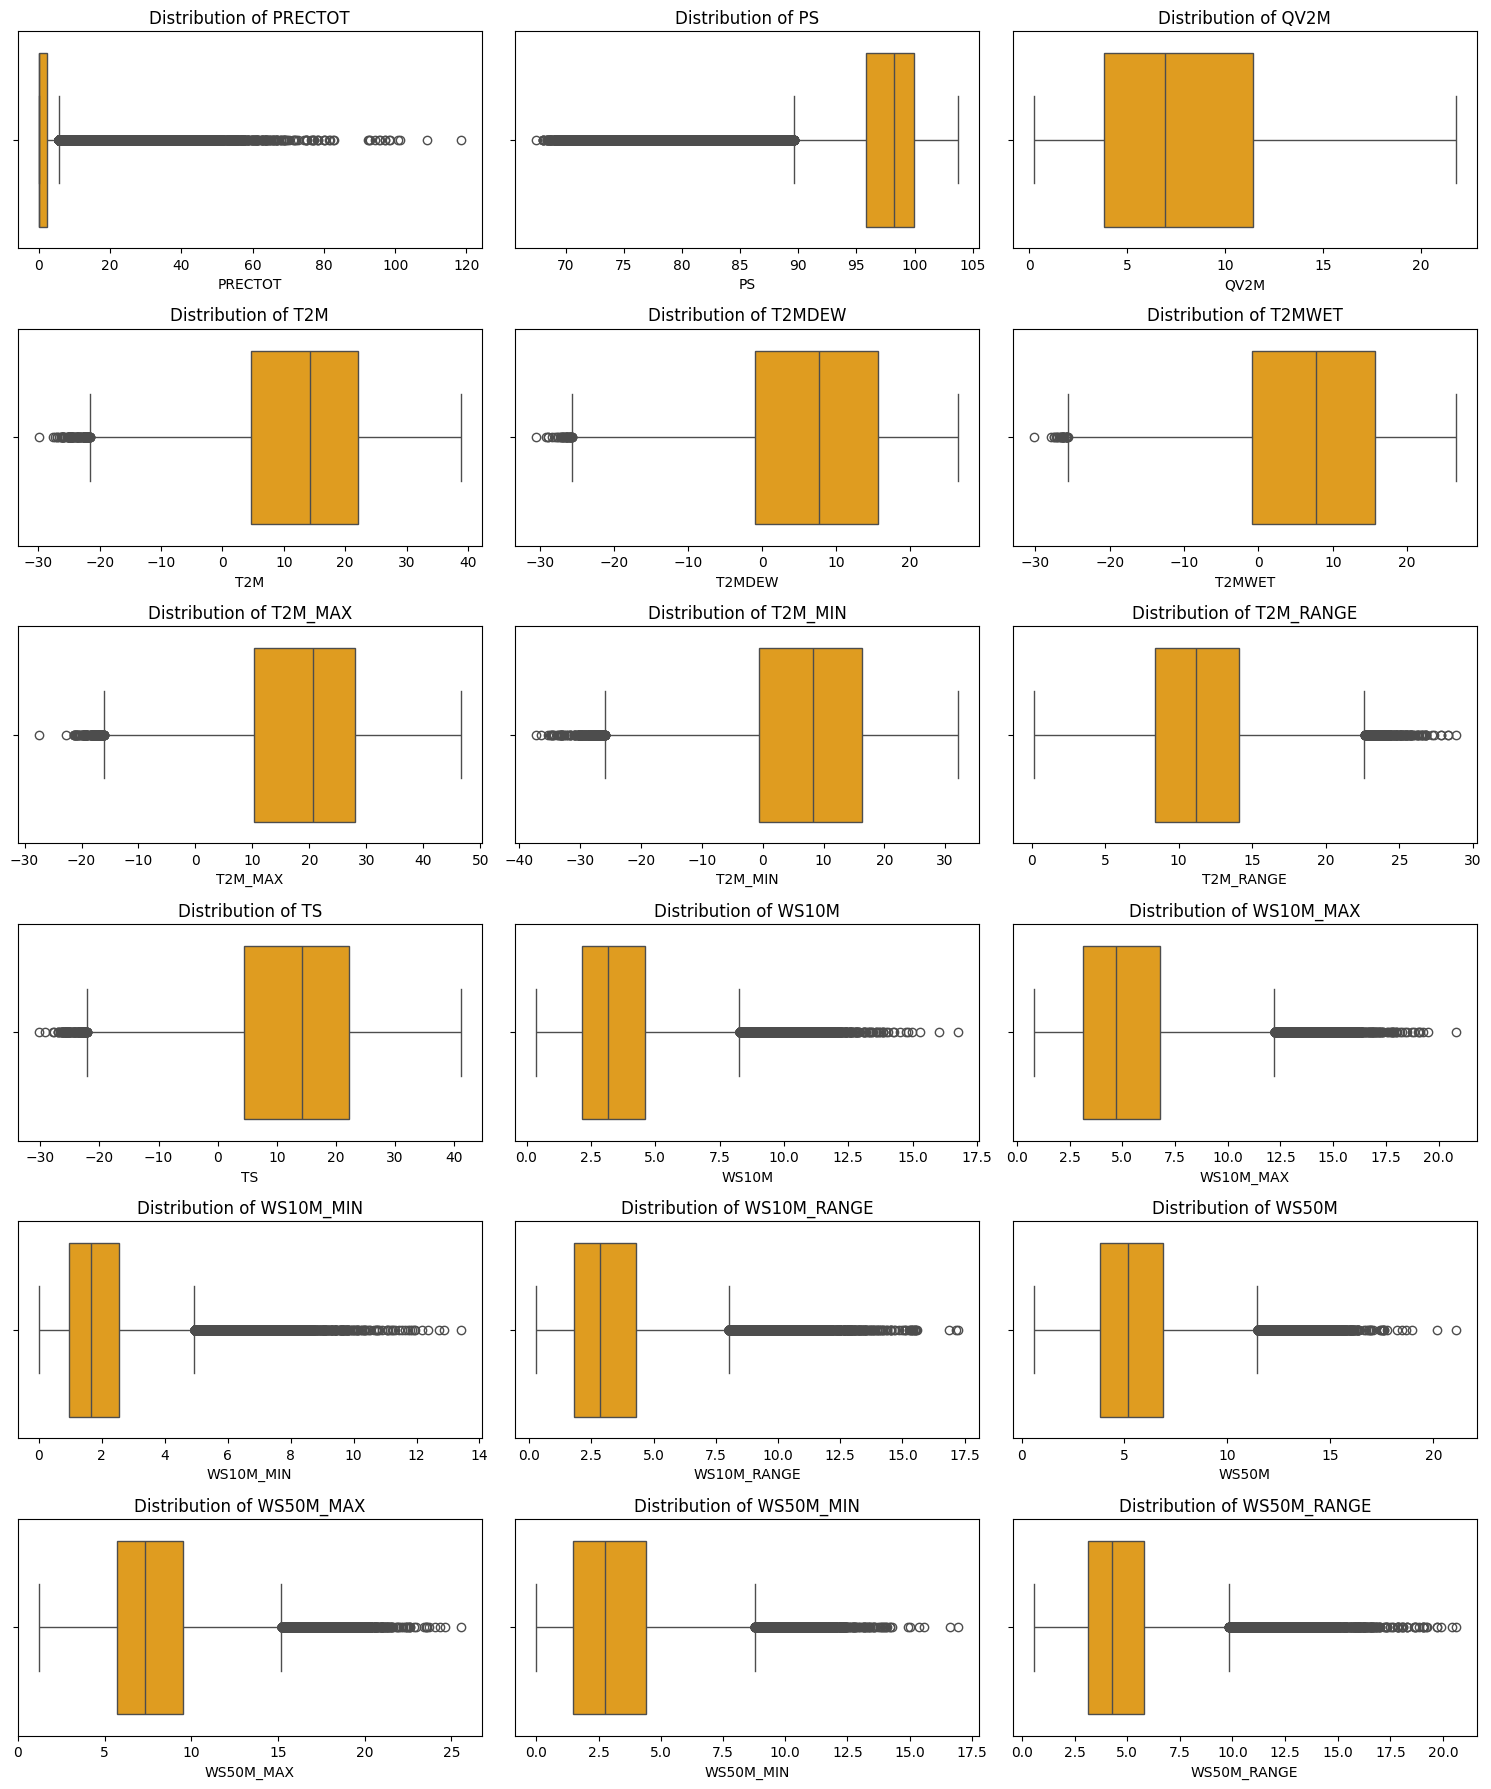

In [ ]:
# boxplot for analysing the outliers in each columnns

cols = 3
rows = (len(drought_df_measures.columns) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))
axes = axes.flatten()

for idx, col_name in enumerate(drought_df_measures.columns):
    sns.boxplot(x=drought_df_measures[col_name], ax=axes[idx], color='orange')
    axes[idx].set_title(f'Distribution of {col_name}')

for i in range(len(drought_df_measures.columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:
# checking how many outliers are present in each columns by 3-sigma rule

print('Total rows = ',len(drought_df_measures.index))
for i in drought_df_measures.select_dtypes(exclude = ['object']).columns:
    print ('Number of values beyong standard outlier limit in ', i)
    print(len(drought_df_measures[(drought_df_measures[i] > drought_df_measures[i].mean() + 3*drought_df_measures[i].std()) | (drought_df_measures[i] < drought_df_measures[i].mean() - 3*drought_df_measures[i].std())]))

Total rows =  137484
Number of values beyong standard outlier limit in  PRECTOT
3277
Number of values beyong standard outlier limit in  PS
3655
Number of values beyong standard outlier limit in  QV2M
0
Number of values beyong standard outlier limit in  T2M
222
Number of values beyong standard outlier limit in  T2MDEW
92
Number of values beyong standard outlier limit in  T2MWET
72
Number of values beyong standard outlier limit in  T2M_MAX
157
Number of values beyong standard outlier limit in  T2M_MIN
319
Number of values beyong standard outlier limit in  T2M_RANGE
196
Number of values beyong standard outlier limit in  TS
220
Number of values beyong standard outlier limit in  WS10M
1472
Number of values beyong standard outlier limit in  WS10M_MAX
1147
Number of values beyong standard outlier limit in  WS10M_MIN
1994
Number of values beyong standard outlier limit in  WS10M_RANGE
1747
Number of values beyong standard outlier limit in  WS50M
1134
Number of values beyong standard outlier lim

In [ ]:
# removing outliers using 3-sigma (we don't want IQR method)

drought_df = drought_df[(drought_df['PRECTOT'] <= drought_df['PRECTOT'].mean() + 3*drought_df['PRECTOT'].std()) &
        (drought_df['PRECTOT'] >= drought_df['PRECTOT'].mean() - 3*drought_df['PRECTOT'].std())]

drought_df = drought_df[(drought_df['PS'] <= drought_df['PS'].mean() + 3*drought_df['PS'].std()) &
        (drought_df['PS'] >= drought_df['PS'].mean() - 3*drought_df['PS'].std())]

drought_df = drought_df[(drought_df['QV2M'] <= drought_df['QV2M'].mean() + 3*drought_df['QV2M'].std()) &
        (drought_df['QV2M'] >= drought_df['QV2M'].mean() - 3*drought_df['QV2M'].std())]

drought_df = drought_df[(drought_df['T2M'] <= drought_df['T2M'].mean() + 3*drought_df['T2M'].std()) &
        (drought_df['T2M'] >= drought_df['T2M'].mean() - 3*drought_df['T2M'].std())]

drought_df = drought_df[(drought_df['T2MDEW'] <= drought_df['T2MDEW'].mean() + 3*drought_df['T2MDEW'].std()) &
        (drought_df['T2MDEW'] >= drought_df['T2MDEW'].mean() - 3*drought_df['T2MDEW'].std())]

drought_df = drought_df[(drought_df['T2MWET'] <= drought_df['T2MWET'].mean() + 3*drought_df['T2MWET'].std()) &
        (drought_df['T2MWET'] >= drought_df['T2MWET'].mean() - 3*drought_df['T2MWET'].std())]

drought_df = drought_df[(drought_df['T2M_MAX'] <= drought_df['T2M_MAX'].mean() + 3*drought_df['T2M_MAX'].std()) &
        (drought_df['T2M_MAX'] >= drought_df['T2M_MAX'].mean() - 3*drought_df['T2M_MAX'].std())]

drought_df = drought_df[(drought_df['T2M_MIN'] <= drought_df['T2M_MIN'].mean() + 3*drought_df['T2M_MIN'].std()) &
        (drought_df['T2M_MIN'] >= drought_df['T2M_MIN'].mean() - 3*drought_df['T2M_MIN'].std())]

drought_df = drought_df[(drought_df['T2M_RANGE'] <= drought_df['T2M_RANGE'].mean() + 3*drought_df['T2M_RANGE'].std()) &
        (drought_df['T2M_RANGE'] >= drought_df['T2M_RANGE'].mean() - 3*drought_df['T2M_RANGE'].std())]

drought_df = drought_df[(drought_df['TS'] <= drought_df['TS'].mean() + 3*drought_df['TS'].std()) &
        (drought_df['TS'] >= drought_df['TS'].mean() - 3*drought_df['TS'].std())]

drought_df = drought_df[(drought_df['WS10M'] <= drought_df['WS10M'].mean() + 3*drought_df['WS10M'].std()) &
        (drought_df['WS10M'] >= drought_df['WS10M'].mean() - 3*drought_df['WS10M'].std())]

drought_df = drought_df[(drought_df['WS10M_MAX'] <= drought_df['WS10M_MAX'].mean() + 3*drought_df['WS10M_MAX'].std()) &
        (drought_df['WS10M_MAX'] >= drought_df['WS10M_MAX'].mean() - 3*drought_df['WS10M_MAX'].std())]

drought_df = drought_df[(drought_df['WS10M_MIN'] <= drought_df['WS10M_MIN'].mean() + 3*drought_df['WS10M_MIN'].std()) &
        (drought_df['WS10M_MIN'] >= drought_df['WS10M_MIN'].mean() - 3*drought_df['WS10M_MIN'].std())]

drought_df = drought_df[(drought_df['WS10M_RANGE'] <= drought_df['WS10M_RANGE'].mean() + 3*drought_df['WS10M_RANGE'].std()) &
        (drought_df['WS10M_RANGE'] >= drought_df['WS10M_RANGE'].mean() - 3*drought_df['WS10M_RANGE'].std())]

drought_df = drought_df[(drought_df['WS50M'] <= drought_df['WS50M'].mean() + 3*drought_df['WS50M'].std()) &
        (drought_df['WS50M'] >= drought_df['WS50M'].mean() - 3*drought_df['WS50M'].std())]

drought_df = drought_df[(drought_df['WS50M_MAX'] <= drought_df['WS50M_MAX'].mean() + 3*drought_df['WS50M_MAX'].std()) &
        (drought_df['WS50M_MAX'] >= drought_df['WS50M_MAX'].mean() - 3*drought_df['WS50M_MAX'].std())]

drought_df = drought_df[(drought_df['WS50M_MIN'] <= drought_df['WS50M_MIN'].mean() + 3*drought_df['WS50M_MIN'].std()) &
        (drought_df['WS50M_MIN'] >= drought_df['WS50M_MIN'].mean() - 3*drought_df['WS50M_MIN'].std())]

drought_df = drought_df[(drought_df['WS50M_RANGE'] <= drought_df['WS50M_RANGE'].mean() + 3*drought_df['WS50M_RANGE'].std()) &
        (drought_df['WS50M_RANGE'] >= drought_df['WS50M_RANGE'].mean() - 3*drought_df['WS50M_RANGE'].std())]

print('Total rows = ',len(drought_df.index))

Total rows =  123406


In [ ]:
drought_df.shape

(123406, 20)

In [ ]:
drought_df.columns

Index(['fips', 'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET', 'T2M_MAX',
       'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX', 'WS10M_MIN',
       'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'WS50M_RANGE',
       'score'],
      dtype='object')

### Scatterplots for spatial relationships

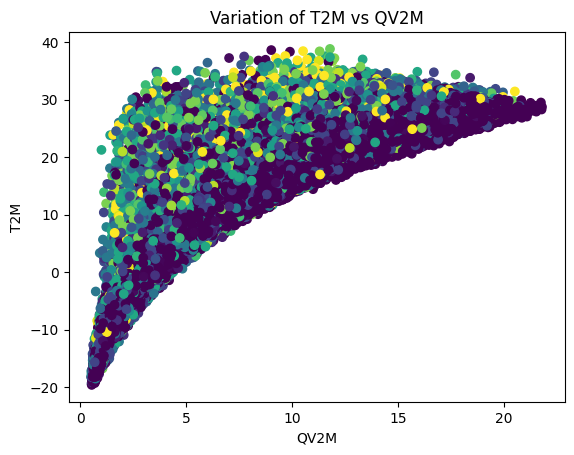

In [ ]:
plt.scatter(drought_df['QV2M'], drought_df['T2M'], c =drought_df['score'])
plt.xlabel('QV2M')
plt.ylabel('T2M')
plt.title('Variation of T2M vs QV2M')
plt.show()

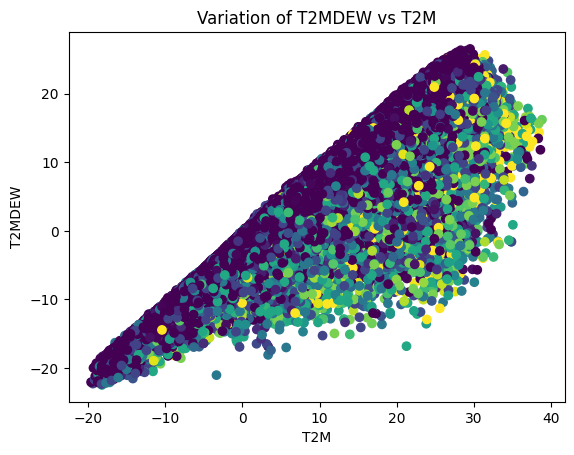

In [ ]:
plt.scatter(drought_df['T2M'], drought_df['T2MDEW'], c =drought_df['score'])
plt.xlabel('T2M')
plt.ylabel('T2MDEW')
plt.title('Variation of T2MDEW vs T2M')
plt.show()

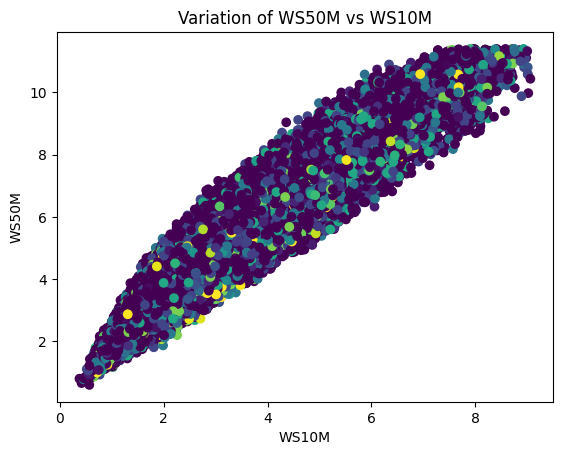

In [ ]:
temp_df = drought_df[drought_df['score']==5]
plt.scatter(drought_df['WS10M'], drought_df['WS50M'], c= drought_df['score'])
plt.xlabel('WS10M')
plt.ylabel('WS50M')
plt.title('Variation of WS50M vs WS10M')
plt.show()

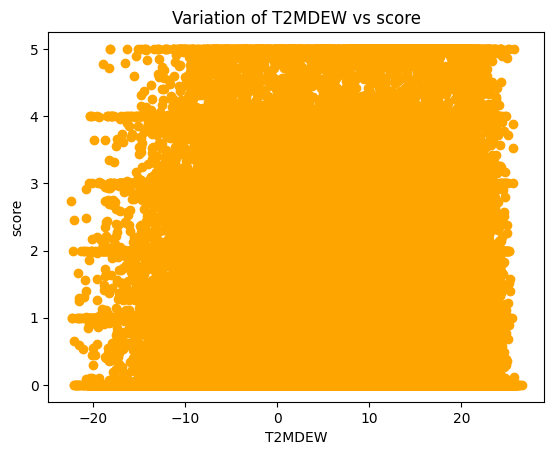

In [ ]:
plt.scatter(drought_df['T2MDEW'], drought_df['score'],color='orange')
plt.xlabel('T2MDEW')
plt.ylabel('score')
plt.title('Variation of T2MDEW vs score')
plt.show()

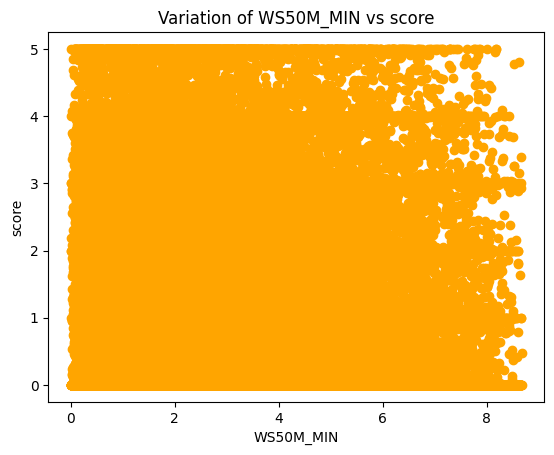

In [ ]:
plt.scatter(drought_df['WS50M_MIN'], drought_df['score'],color='orange')
plt.xlabel('WS50M_MIN')
plt.ylabel('score')
plt.title('Variation of WS50M_MIN vs score')
plt.show()

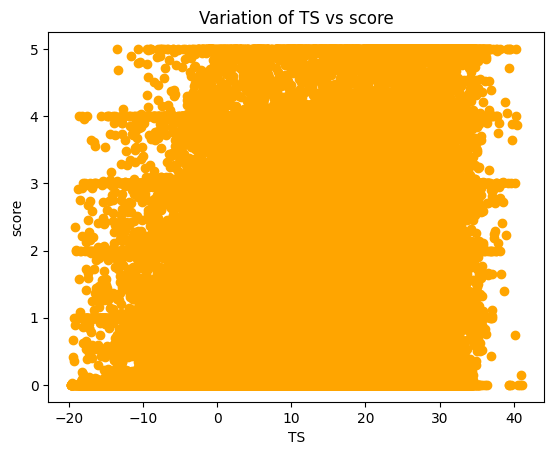

In [ ]:
plt.scatter(drought_df['TS'], drought_df['score'],color='orange')
plt.xlabel('TS')
plt.ylabel('score')
plt.title('Variation of TS vs score')
plt.show()

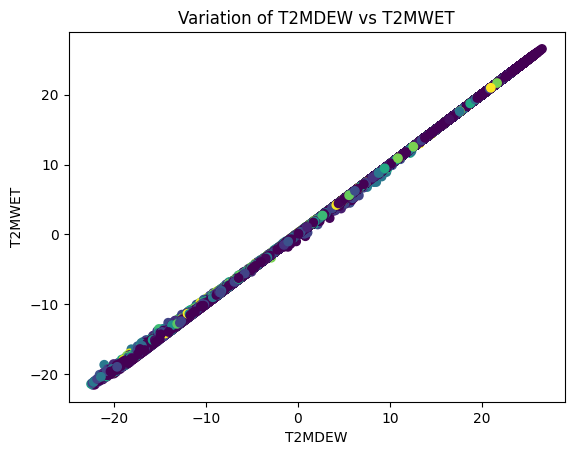

In [ ]:
plt.scatter(drought_df['T2MDEW'], drought_df['T2MWET'], c =drought_df['score'])
plt.xlabel('T2MDEW')
plt.ylabel('T2MWET')
plt.title('Variation of T2MDEW vs T2MWET')
plt.show()

In [ ]:
target = drought_df['score']

In [ ]:
print(target.shape)
target.head()

(123406,)


,score
15398891,0.0000
11433166,0.0000
1797073,0.0000
8516111,1.2053
9736771,1.5433


In [ ]:
target.value_counts()

,count
score,
0.0000,66854
1.0000,9911
2.0000,5508
3.0000,3656
4.0000,1981
...,...
2.1683,1
2.3042,1
0.2373,1


In [ ]:
bins = [0, 1.5, 2.5, 3.5, 4.5, 5]  # Define the bins
labels = [1, 2, 3, 4, 5]  # Corresponding labels for each bin

# Apply the discretization to the target column
target_rounded = pd.cut(target, bins=bins, labels=labels, include_lowest=True)

# To ensure the data is in integer format, we can convert it:
target_rounded = target_rounded.astype(int)

# Display the transformed values
print(target_rounded.value_counts())

score
1    95154
2    13080
3     8628
4     4661
5     1883
Name: count, dtype: int64


In [ ]:
ind_variables = drought_df.drop('score', axis = 1)
ind_variables = ind_variables.drop('fips', axis = 1)
print(ind_variables.shape)

(123406, 18)


In [ ]:
correlation_plot = ind_variables.corr()
correlation_plot.style.background_gradient(cmap = 'coolwarm')

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
PRECTOT,1.000000,0.051578,0.285634,0.116623,0.263401,0.263309,0.042434,0.178274,-0.347884,0.113321,0.001636,0.009491,-0.008991,0.018888,0.013400,0.004211,0.034282,-0.029273
PS,0.051578,1.000000,0.257920,0.119558,0.300748,0.300657,0.072761,0.159473,-0.210141,0.115255,-0.108882,-0.164666,0.012130,-0.229275,-0.062649,-0.121846,0.029405,-0.185060
QV2M,0.285634,0.257920,1.000000,0.873400,0.962999,0.963955,0.807411,0.910853,-0.062454,0.865753,-0.215970,-0.245633,-0.099969,-0.261501,-0.200186,-0.250435,-0.075092,-0.243500
T2M,0.116623,0.119558,0.873400,1.000000,0.913850,0.914509,0.983709,0.982159,0.261054,0.997734,-0.191526,-0.202556,-0.112739,-0.194972,-0.183972,-0.197231,-0.106660,-0.143773
T2MDEW,0.263401,0.300748,0.962999,0.913850,1.000000,0.999976,0.856405,0.940044,0.002678,0.905145,-0.228212,-0.257612,-0.105372,-0.273890,-0.196993,-0.244419,-0.074901,-0.236017
T2MWET,0.263309,0.300657,0.963955,0.914509,0.999976,1.000000,0.857058,0.940719,0.002790,0.905843,-0.228054,-0.257379,-0.105436,-0.273534,-0.197081,-0.244450,-0.075067,-0.235890
T2M_MAX,0.042434,0.072761,0.807411,0.983709,0.856405,0.857058,1.000000,0.939288,0.421652,0.980886,-0.197774,-0.202741,-0.125023,-0.186843,-0.181889,-0.181001,-0.124487,-0.105073
T2M_MIN,0.178274,0.159473,0.910853,0.982159,0.940044,0.940719,0.939288,1.000000,0.084917,0.979656,-0.190741,-0.207449,-0.103116,-0.208102,-0.190596,-0.219892,-0.091828,-0.187648
T2M_RANGE,-0.347884,-0.210141,-0.062454,0.261054,0.002678,0.002790,0.421652,0.084917,1.000000,0.259472,-0.070247,-0.040515,-0.090550,0.007378,-0.024503,0.055493,-0.118825,0.190771
TS,0.113321,0.115255,0.865753,0.997734,0.905145,0.905843,0.980886,0.979656,0.259472,1.000000,-0.173063,-0.184146,-0.098050,-0.180280,-0.171522,-0.183527,-0.096863,-0.136193


Attributes QV2M, T2M, T2MDEW, T2MWET, T2M_MAX, T2M_MIN and TS have shown strong positive correlation
Similary WS10M, WS10M_MAX and WS10M_MIN have shown a strong positve correlation
Likewise, WS50M, WS50M_MAX and WS50M_MIN show strong positive correlation
However, from the scatter plots above, we see significant variance between the data points, despite the strong positive correlation. Hence we'll retain all these variables, and try other feature selection methods.

## Post EDA Data Handling

Test-Train Splitting

Due to huge size of the data (2.7 million rows), we take the following steps in order to make the project viable to present

In [ ]:
# sampled_data = data.sample(frac=0.05, random_state=42)

In [ ]:
# Convert 1, 2 to 0 and 3, 4, 5 to 1
target_rounded = target_rounded.apply(lambda x: 0 if x in [1, 2] else 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ind_variables, target_rounded, test_size=0.2, random_state=0)

In [ ]:
print("Train features shape", X_train.shape)
print("Train target shape", y_train.shape)
print("Test features shape", X_test.shape)
print("Test target shape", y_test.shape)

Train features shape (98724, 18)
Train target shape (98724,)
Test features shape (24682, 18)
Test target shape (24682,)


Standardization of data

In [ ]:
# scaling the data to mean = 0, variance = 1

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train = pd.DataFrame(X_train)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.080280,0.153666,0.929405,0.776008,0.930808,0.932166,0.624576,0.916107,-0.607591,0.767469,1.607417,0.895692,2.330349,-0.383812,1.637492,0.973346,2.293037,-1.075394
1,1.940053,-2.202240,-0.558405,-0.627286,-0.464546,-0.468999,-0.627780,-0.482448,-0.548830,-0.615473,-0.805150,-0.747824,-0.393961,-0.734155,-0.735281,-0.960668,-0.210726,-1.005903
2,0.618364,0.604797,1.592774,1.111942,1.344880,1.348263,0.973478,1.240633,-0.449192,1.094048,0.516628,0.494944,0.587852,0.262511,0.554379,0.201419,1.038509,-0.792082
3,-0.510416,0.395181,0.344454,0.428907,0.570132,0.569726,0.452322,0.579990,-0.216703,0.422646,-0.368835,-0.248015,0.083678,-0.389852,-0.110602,-0.276841,0.408598,-0.765354
4,-0.515629,1.017195,0.263917,0.836495,0.547967,0.547453,0.938324,0.571297,1.216552,0.931670,-0.586993,-0.693790,-0.261284,-0.752276,-0.664752,-0.281036,-0.528328,0.175458


In [ ]:
X_train = pd.DataFrame(X_train, columns=ind_variables.columns)
X_test = pd.DataFrame(X_test, columns=ind_variables.columns)

In [ ]:
X_train = X_train.astype(np.float64)
y_train = y_train.astype(np.float64)
X_test = X_test.astype(np.float64)
y_test = y_test.astype(np.float64)


# Building Models


## PCA

In [ ]:
import numpy as np

class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        X = X.astype(np.float64)

        X = np.nan_to_num(X)

        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        cov_matrix = np.cov(X, rowvar=False)

        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        self.components = eigenvectors[:self.n_components]

    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components.T)


n_components = 5
pca = PCA(n_components=n_components)
X_train_numeric = X_train.select_dtypes(include=np.number).astype(np.float64)
pca.fit(X_train_numeric.values)
X_train_pca = pca.transform(X_train_numeric.values)

X_test_numeric = X_test.select_dtypes(include=np.number).astype(np.float64)
X_test_pca = pca.transform(X_test_numeric.values)

print(f"Transformed X_train shape: {X_train_pca.shape}")
print(f"Transformed X_test shape: {X_test_pca.shape}")

Transformed X_train shape: (98724, 5)
Transformed X_test shape: (24682, 5)


In [ ]:
y_train.dtype


dtype('int64')

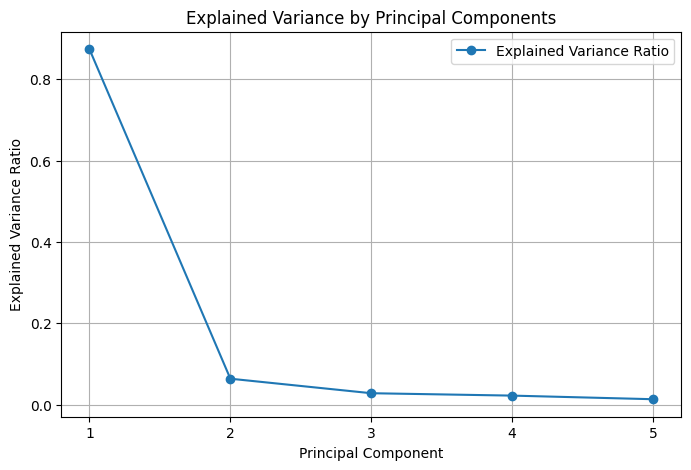

In [ ]:
import matplotlib.pyplot as plt

# Calculate explained variance
eigenvalues = np.var(X_train_pca, axis=0)
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', label='Explained Variance Ratio')
plt.title("Explained Variance by Principal Components")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid()
plt.legend()
plt.show()

## Logistic Regression

In [ ]:
# using in-built

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 87.73%
Confusion Matrix:
[[21457   255]
 [ 2774   196]]


87.72789887367313

In [ ]:
xx = pd.DataFrame(X_train_pca)
xxx = pd.DataFrame(X_test_pca)

Loss at iteration 0: 0.6931471805599454
Loss at iteration 20: 0.38796518317966633
Loss at iteration 40: 0.2237704012215973
Loss at iteration 60: 0.07896049231930463
Loss at iteration 80: -0.056611761301366456
Loss at iteration 100: -0.18584179196941694
Loss at iteration 120: -0.26211644330901623
Loss at iteration 140: -0.28905759452952734
Loss at iteration 160: -0.29866705928493703
Loss at iteration 180: -0.3021058095198112
Loss at iteration 200: -0.30333777411513013
Loss at iteration 220: -0.30363000411465463
Loss at iteration 240: -0.30366755752849045
Loss at iteration 260: -0.303672383571031
Loss at iteration 280: -0.30367300377520406
Loss at iteration 300: -0.30367308347921257
Loss at iteration 320: -0.3036730907603836
Loss at iteration 340: -0.30367309109579627
Loss at iteration 360: -0.3036730911113409
Loss at iteration 380: -0.3036730911120409
Loss at iteration 400: -0.3036730911120793
Loss at iteration 420: -0.3036730911120802
Loss at iteration 440: -0.3036730911120802
Loss at 

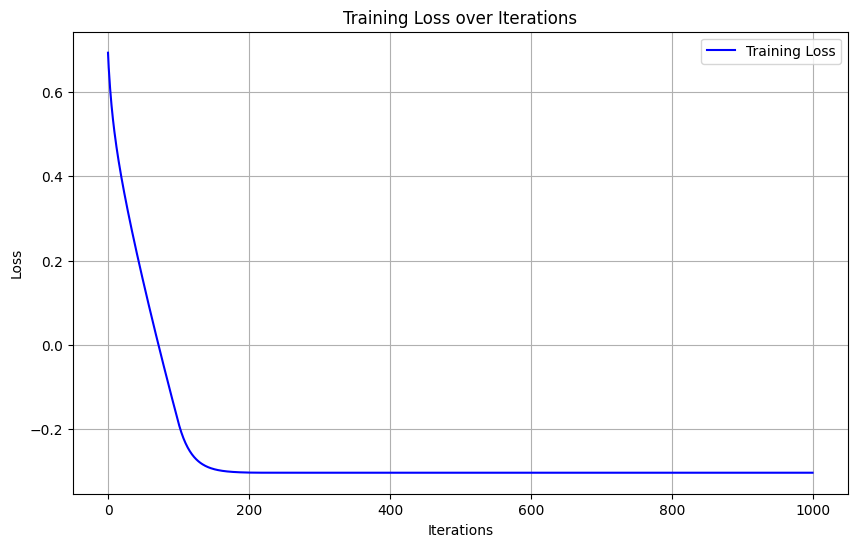

In [ ]:

import numpy as np

class LogisticRegressionCustom:
    def __init__(self, learning_rate=0.005, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.losses = []


    def adjust_learning_rate(self, iteration):
        # Exponential decay
        return self.lr * (0.95 ** (iteration // 100))

    def fit(self, X, y):
        X = X.astype(np.float64)

        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for iteration in range(self.n_iters):
            self.lr = self.adjust_learning_rate(iteration)
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            loss = - (1 / n_samples) * np.sum(
                y * np.log(np.clip(y_predicted, 1e-15, 1 - 1e-15)) +
                (1 - y) * np.log(np.clip(1 - y_predicted, 1e-15, 1 - 1e-15))
            )
            self.losses.append(loss)
            if iteration % 20 == 0:
                loss = - (1 / n_samples) * np.sum(
                    y * np.log(np.clip(y_predicted, 1e-15, 1 - 1e-15)) +
                    (1 - y) * np.log(np.clip(1 - y_predicted, 1e-15, 1 - 1e-15))
                )
                print(f"Loss at iteration {iteration}: {loss}")

    def predict(self, X):
        X = X.astype(np.float64)

        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        return (y_predicted > 0.5).astype(int)

    def _sigmoid(self, x):
        x = np.array(x, dtype=np.float64)

        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))

custom_log_reg = LogisticRegressionCustom(learning_rate=0.0075, n_iters=1000)
custom_log_reg.fit(xx.values, y_train.values)
y_pred_log_reg = custom_log_reg.predict(xxx.values)
accuracy_log_reg = np.sum(y_pred_log_reg == y_test.values) / len(y_test)
accuracy_log_reg = round(accuracy_log_reg * 100, 2)
print(f"Accuracy of custom logistic regression: {accuracy_log_reg}%")

# Visualizing the training loss
plt.figure(figsize=(10, 6))
plt.plot(range(custom_log_reg.n_iters), custom_log_reg.losses, label="Training Loss", color="blue")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Loss over Iterations")
plt.legend()
plt.grid()
plt.show()


## SVM

In [ ]:
import numpy as np

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
        self.losses = []

    def fit(self, X, y):
        X = X.astype(np.float64)
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        self.w = np.random.randn(n_features) * 0.01
        self.b = 0

        for iteration in range(self.n_iters):
            gradients_w = np.zeros_like(self.w)
            gradients_b = 0
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    gradients_w += 2 * self.lambda_param * self.w
                else:
                    gradients_w += 2 * self.lambda_param * self.w - np.dot(x_i, y_[idx])
                    gradients_b += -y_[idx]

            self.w -= self.lr * gradients_w / n_samples
            self.b -= self.lr * gradients_b / n_samples

            loss = self.hinge_loss(X, y_)
            self.losses.append(loss)
            # if iteration % 10 == 0:
            #     loss = self.hinge_loss(X, y_)
            #     print(f"Loss at iteration {iteration}: {loss}")

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        predictions = np.sign(approx)
        # Change here to convert -1 to 0
        predictions = np.where(predictions == -1, 0, predictions)
        return predictions

    def hinge_loss(self, X, y):
        loss = 0
        for idx, x_i in enumerate(X):
            loss += max(0, 1 - y[idx] * (np.dot(x_i, self.w) - self.b))
        loss /= len(X)
        return loss


svm = SVM()
svm.fit(X_train.values, y_train.values)
y_pred_svm = svm.predict(X_test.values)

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

accuracy_svm = accuracy(y_test, y_pred_svm)
accuracy_svm = round(accuracy_svm * 100, 2)
print("SVM classification accuracy", accuracy_svm)

# plt.figure(figsize=(10, 6))
# plt.plot(range(svm.n_iters), svm.losses, label="Hinge Loss", color="blue")
# plt.xlabel("Iterations")
# plt.ylabel("Hinge Loss")
# plt.title("SVM Training: Hinge Loss over Iterations")
# plt.legend()
# plt.grid()
# plt.show()

SVM classification accuracy 87.97


In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Standardize the features (important for SVM)
scaler = StandardScaler()
X_train_pca_scaled = scaler.fit_transform(X_train_pca)

# Initialize the SVM model
svm = SVC(kernel='linear', C=1.0)  # Linear kernel, C is the regularization parameter

# Fit the model on the training data
svm.fit(X_train_pca_scaled, y_train)

# Predict on the training data
y_pred = svm.predict(X_train_pca_scaled)

# Calculate accuracy
accuracy_svm = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy_svm*100}")



Accuracy: 0.8764029010169766


In [ ]:
# X_train = X_train.astype(np.float64)
# y_train = y_train.astype(np.int64)
# X_test = X_test.astype(np.float64)
# y_test = y_test.astype(np.int64)

# train_features = np.array(train_features, dtype=float)
# test_features = np.array(test_features, dtype=float)



# Naiye bayes

In [ ]:
import numpy as np

class NaiveBayes:
    def __init__(self):
        self.classes = None
        self.priors = None
        self.likelihoods = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        n_samples, n_features = X.shape

        self.priors = np.array([np.sum(y == cls) / n_samples for cls in self.classes])

        self.likelihoods = {}
        for cls in self.classes:
            X_cls = X[y == cls]
            class_likelihoods = []
            for feature_idx in range(n_features):
                feature_vals, counts = np.unique(X_cls[:, feature_idx], return_counts=True)
                likelihood = {val: (count + 1) / (X_cls.shape[0] + len(np.unique(X[:, feature_idx])))
                              for val, count in zip(feature_vals, counts)}
                class_likelihoods.append(likelihood)
            self.likelihoods[cls] = class_likelihoods

    def predict(self, X):

        n_samples, n_features = X.shape
        log_priors = np.log(self.priors)

        predictions = []
        for sample in X:
            log_posteriors = []
            for cls_idx, cls in enumerate(self.classes):
                log_likelihood = np.sum([
                    np.log(self.likelihoods[cls][feature_idx].get(sample[feature_idx], 1e-6))
                    for feature_idx in range(n_features)
                ])
                log_posteriors.append(log_priors[cls_idx] + log_likelihood)

            predictions.append(self.classes[np.argmax(log_posteriors)])
        return np.array(predictions)


In [ ]:
# X_train = X_train.reset_index(drop=True)
# y_train = y_train.reset_index(drop=True)


In [ ]:
y_train.nunique()


2

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
nb = GaussianNB()

nb.fit(X_train_pca, y_train)
y_pred = nb.predict(X_test_pca)

gnbacc = accuracy_score(y_test, y_pred)

print("Accuracy:" ,gnbacc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8605056316343894

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92     21712
           1       0.36      0.20      0.26      2970

    accuracy                           0.86     24682
   macro avg       0.63      0.58      0.59     24682
weighted avg       0.83      0.86      0.84     24682



In [ ]:
y_pred = nb.predict(X_test)

In [ ]:
nb_accuracy = round(balanced_accuracy_score(X_test, y_test), 3)
nb_accuracy

In [ ]:
# # Decision Trees

# from sklearn.tree import DecisionTreeClassifier
# def train_using_gini(X_train, X_test, y_train):

#     # Creating the classifier object
#     clf_gini = DecisionTreeClassifier(criterion="gini",
#                                       random_state=100, max_depth=3, min_samples_leaf=5)

#     # Performing training
#     clf_gini.fit(X_train, y_train)
#     return clf_gini

# def train_using_entropy(X_train, X_test, y_train):

#     # Decision tree with entropy
#     clf_entropy = DecisionTreeClassifier(
#         criterion="entropy", random_state=100,
#         max_depth=3, min_samples_leaf=5)

#     # Performing training
#     clf_entropy.fit(X_train, y_train)
#     return clf_entropy

# # Function to make predictions
# def prediction(X_test, clf_object):
#     y_pred = clf_object.predict(X_test)
#     print("Predicted values:")
#     print(y_pred)
#     return y_pred

# # Placeholder function for cal_accuracy
# def cal_accuracy(y_test, y_pred):
#     print("Confusion Matrix: ",
#           confusion_matrix(y_test, y_pred))
#     print("Accuracy : ",
#           accuracy_score(y_test, y_pred)*100)
#     print("Report : ",
#           classification_report(y_test, y_pred))
# from sklearn import tree
# # Function to plot the decision tree
# def plot_decision_tree(clf_object, feature_names, class_names):
#     plt.figure(figsize=(15, 10))
#     plot_tree(clf_object, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
#     plt.show()

# clf_gini = train_using_gini(X_train, X_test, y_train)
# clf_entropy = train_using_entropy(X_train, X_test, y_train)
# print("Results Using Gini Index:")

# y_pred_gini = prediction(X_test, clf_gini)
# cal_accuracy(y_test, y_pred_gini)

# y_pred_entropy = prediction(X_test, clf_entropy)
# cal_accuracy(y_test, y_pred_entropy)

# DT_Acc = accuracy_score(y_test, y_pred_gini)*100
# print(DT_Acc)

Results Using Gini Index:
Predicted values:
[0 0 0 ... 0 0 0]
Confusion Matrix:  [[21712     0]
 [ 2970     0]]
Accuracy :  87.96693947005916


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Report :                precision    recall  f1-score   support

           0       0.88      1.00      0.94     21712
           1       0.00      0.00      0.00      2970

    accuracy                           0.88     24682
   macro avg       0.44      0.50      0.47     24682
weighted avg       0.77      0.88      0.82     24682

Predicted values:
[0 0 0 ... 0 0 0]
Confusion Matrix:  [[21712     0]
 [ 2970     0]]
Accuracy :  87.96693947005916
Report :                precision    recall  f1-score   support

           0       0.88      1.00      0.94     21712
           1       0.00      0.00      0.00      2970

    accuracy                           0.88     24682
   macro avg       0.44      0.50      0.47     24682
weighted avg       0.77      0.88      0.82     24682

87.96693947005916


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


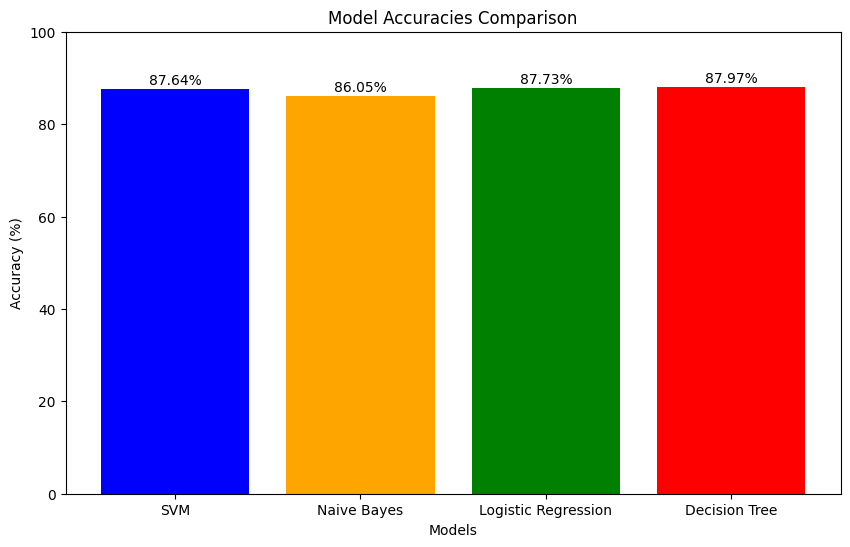

In [ ]:
# comparing all
import matplotlib.pyplot as plt

models = ['SVM', 'Naive Bayes','Logistic Regression','Decision Tree']
accuracies = [accuracy_svm*100,  gnbacc*100, accuracy * 100,DT_Acc]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green','red'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracies Comparison')
plt.ylim(0, 100)
for i, v in enumerate(accuracies):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontsize=10, color='black')
plt.show()
